# Problem Formulation

1 Define the problem  ?

In this assignment, fake news are predicted from reddit website by looking at the title of the news. It is a sequential data problem. we are going to predict if a specific reddit post is fake news or not, by looking at its title

2 What is the input ? 

the input is previous data in raw form The data in this problem is in the text format. Each data entry contains number of words which represents the title of the news. It is a labelled data with label as 1 or 0 which implies if the news is fake or not respectively. Number of words in each data entry varies as the title length changes

3 What is the output?

we are going to predict if a specific reddit post is fake news or not, by looking at its title is the prediction whether the give titled news is fake or not.

4 What data mining function is required ?

The model is classification model.
  classification is the technique to categorize elements in a collection,basis their predefined functionalities and properties. In classification, the model can classify new instances whose classification is unknown.
These particular instances that are used to create the model are called training data. Such a mechanism of classification uses methods like if-then,decision trees, neural networks, or even a set of classification rules These methods can be retrieved to identify future data.

5 What could be the challenges ?

The challenges that we have is to clean the data froma the noise in the dataset and preprocessing To convert the text data to the numeric form so that it can be trained on some model, tokenizer package and pad_sequence function is used. Before that, the stop words are removed and the words are stemmed using tlnk package.

The training data given has y_label as 0,1 or 2. The label "2" is not the accurate labels as the final output can be 0 or 1 only. I removed those entries with label as 2 (total 232 data entries)

6 What is the impact ?

we are going to predict if a specific reddit post is fake news or not, by looking at its title is the prediction 

7 What is an ideal solution ?

to my rate (XGBClassifier) after making appropriate preprocessing on the dataset to 
help the model to predict the right result after clean the data set and overcome our chalenges

#Imports

In [1]:
import re
import pickle
import sklearn
import pandas as pd
import numpy as np
import holoviews as hv
import nltk 
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from xgboost.sklearn import XGBClassifier
from tensorflow.keras.preprocessing.text import Tokenizer  #Tokenizer library to give each word a token 
from tensorflow.keras.preprocessing.sequence import pad_sequences  #To convert tokenized array to a 2D array
from sklearn.model_selection import train_test_split  # to make train-validation split
from pprint import pprint
from nltk.tokenize import word_tokenize


In [2]:
from bokeh.io import output_notebook
output_notebook()
from pathlib import Path
# some seeting for pandas and hvplot
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [3]:
#import pipeline with the imputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
pip install nltk

#upload data

In [5]:
#upload train data set 
df_train=pd.read_csv("/content/xy_train.csv")
df_train

,id,text,label
0,265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0
...,...,...,...
59995,70046,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0
59996,189377,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0
59998,140950,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0


In [6]:
df_train['text'][2]

'In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/watch?v=ALXulk0T8cg 鈥?""\t0.72\t0\t2\t3\nzwillc92\twe were fishing in the midatlantic yesterday when these twin water spouts touched down and danced around for minutes\t1564935175.0\ti.redd.it\tTrue\tcly213\thttps://preview.redd.it/2ksr2me7ige31.jpg?width=320&crop=smart&auto=webp&s=c2ccc5c9c976a1b9a666c4d45f6592fbcdf91e9a\t\t48.0\t1360\tmildlyinteresting\tWe were fishing in the mid-Atlantic yesterday when these twin water spouts touched down and danced around for 30 minutes\t0.98\t1\t0\t0\n\tibm branches out into condiments\t1401301501.0\tdataconomy.com\tTrue\t26ps9d\thttps://external-preview.redd.it/Zu8MdLiIplYXJH_kYW7O4kKWPy5pFv55FFvOR23z8l8.jpg?width=320&crop=smart&auto=webp&s=99a4df29ec04740d612e98b32345f1c257691599\t\t0.0\t8\tnottheonion\tIBM Branches Out Into Condiments\t0.65\t1\t0\t0\nTheGuyWhoLikesThings\tan accidental find\t1479438190.0\ti.reddituploads.com\tTrue\t5dk6ix\thttps://ex

In [7]:
#upload train data set 
df_test=pd.read_csv("/content/x_test.csv")
df_test

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility"
4,4,"""Believers"" - Hezbollah 2011"
...,...,...
59146,59146,Bicycle taxi drivers of New Delhi
59147,59147,Trump blows up GOP's formula for winning House races
59148,59148,"Napoleon returns from his exile on the island of Elba. (March 1815), Colourised"
59149,59149,Deep down he always wanted to be a ballet dancer


In [8]:
# # the data frame is quite large. we use part of it in this lab if we need to 
# data = df_train.sample(20000)
# data

# Data exploration

In [9]:
# anything missing?
df_train.isnull().sum().sort_values(ascending=False)

id       0
text     0
label    0
dtype: int64

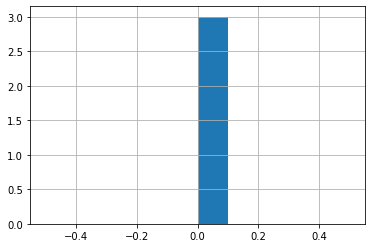

In [10]:
df_train.isnull().sum().hist()

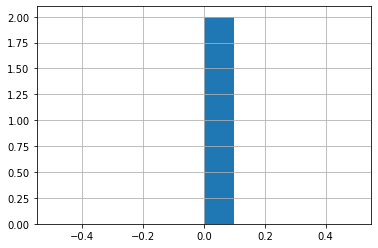

In [11]:
df_test.isnull().sum().hist()

In [12]:
import seaborn as sns

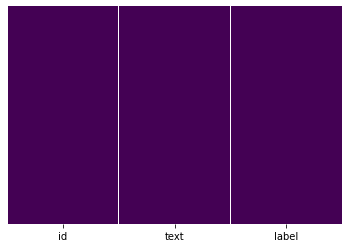

In [13]:
# plot the amount of missing values in the train features.
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can notice that there is no null values

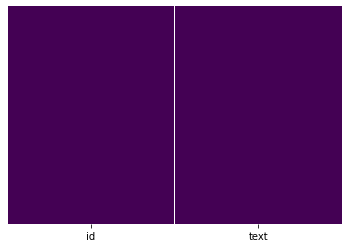

In [14]:
# plot the amount of missing values in the test features.
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can notice that there is no null values

In [15]:
#counts the null vaalues in each column from the highest to the lowest in train data
total = df_train.isnull().sum().sort_values(ascending=False) 
total

id       0
text     0
label    0
dtype: int64

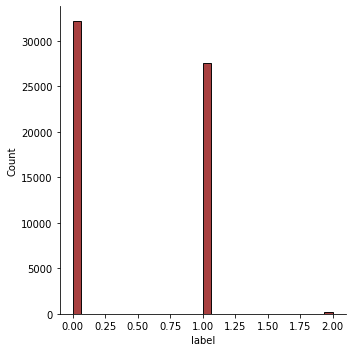

In [16]:
sns.displot(df_train['label'].dropna(),kde=False,color='darkred',bins=30)

### Visualizing numeric values

In [17]:
df_numeric = df_train.select_dtypes(include=np.number)
df_numeric.columns

Index(['id', 'label'], dtype='object')

In [18]:
# # co-relation
import plotly.express as px
fig1 = px.imshow(df_numeric.corr())
fig1.show()

we can notice that there is no coroleation 

### Visualizing categorical columns

In [19]:
df_categorical = df_train.select_dtypes(include =['object'])
df_categorical.columns

Index(['text'], dtype='object')

##Investigating data

In [20]:
# dataframe.info(verbose,buf=buffer,max_cols,memory_usage,show_counts,null_counts)
df_train.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True)  #Investigating data
df_train.info()  #another way without using parameters of df.info function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


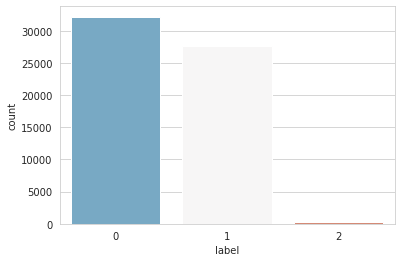

In [21]:
# the count of the real news vs not rreal
sns.set_style('whitegrid')
sns.countplot(x='label', data=df_train,palette='RdBu_r')

In [22]:
# # Trying to understand if text has an impact on the label
# sns.set_style('whitegrid')
# sns.countplot(x='label', hue='text', data=df_train,palette='rainbow')

## Cleaning and pre processing

Having consistent and clean data is fundamental for good modeling results. No matter how sophisticated your model the basic principle is: trash in trash out. When dealing with NLP the cleaning and pre processing can differ depending on which model you intend to use. We will use frequency based representation methods for our text. Thus, we usually want to have a pretty thorough manipulation of the input data:

In [23]:
#Now we will start with the techniques for text preprocessing and clean the data which is ready to build
#a model. let us see the first text and when we will apply the text cleaning technique we will observe
#the changes to the first text.



### 0 drop duplicates

In [24]:
#count the number of False (= the number of non-duplicate rows),
print(~df_train.duplicated())

0        True
1        True
2        True
3        True
4        True
         ... 
59995    True
59996    True
59997    True
59998    True
59999    True
Length: 60000, dtype: bool


In [25]:
#count the number duplicate rows
print(df_test.duplicated().sum())

0


In [26]:
#You can also count True and False together with value_counts()
print(df_train.duplicated().value_counts())

False    60000
dtype: int64


In [27]:
# First, lets drop duplicates (if any)
df_train.drop_duplicates(inplace=True)

In [28]:
print(df_train.duplicated().sum())

0


In [29]:
#socend we don't need the label 2 
df_train=df_train[df_train.label != 2] 

In [30]:
# #drop all the columns that contains null values more than 50 %
# df_train=df_train.loc[:, pd.isnull(df_train).sum()>len(df_train)*.5] 

### 1 Expand Contractions

Contraction is the shortened form of a word like don’t stands for do not, aren’t stands for are not. Like this, we need to expand this contraction in the text data for better analysis. i can get the dictionary of contraction by creating my own and use it .



In [31]:
df_train['text'][0]

'A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Seeing another person who鈥檚 also in need, you should just naturally be like, 鈥業 want to help that person.鈥?\t0.84\t1\t0\t0\nNeoMegaRyuMKII\tdenmark just trolled trump with a bus watch what happens when it moves\t1489962542.0\tarchive.is\tTrue\t60cu90\thttps://external-preview.redd.it/s8HQxoWDwn2pt3eeBjIqetmGxvVMBBxaD93W08lGZrs.jpg?width=320&crop=smart&auto=webp&s=46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t5.0\t36\tsavedyouaclick\tDenmark Just Trolled Trump With A Bus. Watch What Happens When It Moves | Back wheels look like eyes that spin crazily as the bus moves (saved a click + short video that goes into slow motion (video mirror in comments since archive removed it))\t0.92\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t1429563057.0\t\tTrue\tcqiw655\thttp://i.imgur.com/rxTKm4U.jpg\t338ute\t\t6\tpsbattle_artwork\tYoung man, there\'s no need to feel down\t\t0\t2\t4\nbeosronlto

In [32]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
df_train['text']=df_train['text'].apply(lambda x:expand_contractions(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_train['text'][0]

'A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Seeing another person who鈥檚 also in need, you should just naturally be like, 鈥業 want to help that person.鈥?\t0.84\t1\t0\t0\nNeoMegaRyuMKII\tdenmark just trolled trump with a bus watch what happens when it moves\t1489962542.0\tarchive.is\tTrue\t60cu90\thttps://external-preview.redd.it/s8HQxoWDwn2pt3eeBjIqetmGxvVMBBxaD93W08lGZrs.jpg?width=320&crop=smart&auto=webp&s=46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t5.0\t36\tsavedyouaclick\tDenmark Just Trolled Trump With A Bus. Watch What Happens When It Moves | Back wheels look like eyes that spin crazily as the bus moves (saved a click + short video that goes into slow motion (video mirror in comments since archive removed it))\t0.92\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t1429563057.0\t\tTrue\tcqiw655\thttp://i.imgur.com/rxTKm4U.jpg\t338ute\t\t6\tpsbattle_artwork\tYoung man, there is no need to feel down\t\t0\t2\t4\nbeosronlto

###2 Lower Case

If the text is in the same case, it is easy for a machine to interpret the words because the lower case and upper case are treated differently by the machine. for example, words like Ball and ball are treated differently by machine. So, we need to make the text in the same case and the most preferred case is a lower case to avoid such problems.

In [34]:
df_train['text'] = df_train['text'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df_train['text'][0]

'a group of friends began to volunteer at a homeless shelter after their neighbors protested. "seeing another person who鈥檚 also in need, you should just naturally be like, 鈥業 want to help that person.鈥?\t0.84\t1\t0\t0\nneomegaryumkii\tdenmark just trolled trump with a bus watch what happens when it moves\t1489962542.0\tarchive.is\ttrue\t60cu90\thttps://external-preview.redd.it/s8hqxowdwn2pt3eebjiqetmgxvvmbbxad93w08lgzrs.jpg?width=320&crop=smart&auto=webp&s=46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t5.0\t36\tsavedyouaclick\tdenmark just trolled trump with a bus. watch what happens when it moves | back wheels look like eyes that spin crazily as the bus moves (saved a click + short video that goes into slow motion (video mirror in comments since archive removed it))\t0.92\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t1429563057.0\t\ttrue\tcqiw655\thttp://i.imgur.com/rxtkm4u.jpg\t338ute\t\t6\tpsbattle_artwork\tyoung man, there is no need to feel down\t\t0\t2\t4\nbeosronlto

###3 Remove punctuations

One of the other text processing techniques is removing punctuations. there are total 32 main punctuations that need to be taken care of. we can directly use the string module with a regular expression to replace any punctuation in text with an empty string. 32 punctuations which string module provide us is listed below.

'!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'

In [36]:
import string

In [37]:
#remove punctuation
df_train['text'] = df_train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
df_train['text'][0]

'a group of friends began to volunteer at a homeless shelter after their neighbors protested seeing another person who鈥檚 also in need you should just naturally be like 鈥業 want to help that person鈥\t084\t1\t0\t0\nneomegaryumkii\tdenmark just trolled trump with a bus watch what happens when it moves\t14899625420\tarchiveis\ttrue\t60cu90\thttpsexternalpreviewreddits8hqxowdwn2pt3eebjiqetmgxvvmbbxad93w08lgzrsjpgwidth320cropsmartautowebps46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t50\t36\tsavedyouaclick\tdenmark just trolled trump with a bus watch what happens when it moves  back wheels look like eyes that spin crazily as the bus moves saved a click  short video that goes into slow motion video mirror in comments since archive removed it\t092\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t14295630570\t\ttrue\tcqiw655\thttpiimgurcomrxtkm4ujpg\t338ute\t\t6\tpsbattleartwork\tyoung man there is no need to feel down\t\t0\t2\t4\nbeosronlto\tmy onion ring chimp\t14914838600\timgurcom

###4 Remove words and digits containing digits

Sometimes it happens that words and digits combine are written in the text which creates a problem for machines to understand. hence, We need to remove the words and digits which are combined like t60cu90. This type of word is difficult to process so better to remove them or replace them with an empty string. we use regular expressions for this.

In [39]:
#remove words that contains digets
pattern = re.compile(r"[\d]")
df_train['text'] = df_train['text'].apply(lambda x: re.sub(pattern,'',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df_train['text'][0]

'a group of friends began to volunteer at a homeless shelter after their neighbors protested seeing another person who鈥檚 also in need you should just naturally be like 鈥業 want to help that person鈥\t\t\t\t\nneomegaryumkii\tdenmark just trolled trump with a bus watch what happens when it moves\t\tarchiveis\ttrue\tcu\thttpsexternalpreviewredditshqxowdwnpteebjiqetmgxvvmbbxadwlgzrsjpgwidthcropsmartautowebpsfadcabdafadecabb\t\t\t\tsavedyouaclick\tdenmark just trolled trump with a bus watch what happens when it moves  back wheels look like eyes that spin crazily as the bus moves saved a click  short video that goes into slow motion video mirror in comments since archive removed it\t\t\t\t\natbthefirst\tyoung man theres no need to feel down\t\t\ttrue\tcqiw\thttpiimgurcomrxtkmujpg\tute\t\t\tpsbattleartwork\tyoung man there is no need to feel down\t\t\t\t\nbeosronlto\tmy onion ring chimp\t\timgurcom\ttrue\tssx\thttpsexternalpreviewredditmuewxgrxjysiypjqibixpidxrdwoyylnexejpgwidthcropsmartautoweb

###5 Remove Stopwords

Stopwords are the most commonly occurring words in a text which do not provide any valuable information. stopwords like they, there, this, where, etc are some of the stopwords. NLTK library is a common library that is used to remove stopwords and include approximately 180 stopwords which it removes. If we want to add any new word to a set of words then it is easy using the add method.

In [41]:
# import nltk
# nltk.download('stopwords')

In [42]:
# #remove stopwords
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# stop_words.add('subject')
# stop_words.add('http')
# def remove_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])
# df_train['text'] = df_train['text'].apply(lambda x: remove_stopwords(x))

In [43]:
df_train['text'][0]

'a group of friends began to volunteer at a homeless shelter after their neighbors protested seeing another person who鈥檚 also in need you should just naturally be like 鈥業 want to help that person鈥\t\t\t\t\nneomegaryumkii\tdenmark just trolled trump with a bus watch what happens when it moves\t\tarchiveis\ttrue\tcu\thttpsexternalpreviewredditshqxowdwnpteebjiqetmgxvvmbbxadwlgzrsjpgwidthcropsmartautowebpsfadcabdafadecabb\t\t\t\tsavedyouaclick\tdenmark just trolled trump with a bus watch what happens when it moves  back wheels look like eyes that spin crazily as the bus moves saved a click  short video that goes into slow motion video mirror in comments since archive removed it\t\t\t\t\natbthefirst\tyoung man theres no need to feel down\t\t\ttrue\tcqiw\thttpiimgurcomrxtkmujpg\tute\t\t\tpsbattleartwork\tyoung man there is no need to feel down\t\t\t\t\nbeosronlto\tmy onion ring chimp\t\timgurcom\ttrue\tssx\thttpsexternalpreviewredditmuewxgrxjysiypjqibixpidxrdwoyylnexejpgwidthcropsmartautoweb

###6 Stemming 



Stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words. The stemming technique is not used for production purposes because it is not so efficient technique and most of the time it stems the unwanted words. So, to solve the problem another technique came into the market as Lemmatization. there are various types of stemming algorithms like porter stemmer, snowball stemmer. Porter stemmer is widely used present in the NLTK library.

In [44]:
# #stemming
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text.split()])
# df_train["text"] = df_train["text"].apply(lambda x: stem_words(x))

### 7 Lemmatization

Lemmatization is similar to stemming, used to stem the words into root word but differs in working. Actually, Lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary.

In [45]:
# import nltk
# nltk.download('wordnet')

In [46]:
# # Lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# def lemmatize_words(text):
#     return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
# df_train["text"] = df_train["text"].apply(lambda text: lemmatize_words(text))


###8 Remove Extra Spaces

Most of the time text data contain extra spaces or while performing the above preprocessing techniques more than one space is left between the text so we need to control this problem. regular expression library performs well to solve this problem.

In [47]:
# df_train.strip()

In [48]:
# df_train["text"] = df_train["text"].apply(lambda text: re.sub(' +', ' ', text))

###final way

In [49]:
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))


def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The `clean_text` function takes a string input and applies a bunch of manipulations to it (described in the code).

In [50]:
clean_text("Our 'cat' bridge leading from the tree to the roof of my house, from where she can walk up to he.")

'cat bridg lead tree roof hous walk'

This transformation has a few benefits. Removing characters and words that don't hold much meaning reduces the size of our data. Moreover, it can improve prediction performance when modeling by lowering the noise in the data. This is because e.g. stop words like prepositions or punctuation won't allow our model to extract additional information / meaning (at least when using simple models). By stemming and lower casing words we make sure that similar words are treated identically. Thus, we can improve model performance again by increasing the number of relevant data points.  
Let's apply this to our data:

In [51]:
%%time
# Clean text
df_train["text_result"] = df_train.loc[df_train["text"].str.len() > 20, "text"]
df_train["text_result"] = df_train["text_result"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CPU times: user 38.1 s, sys: 137 ms, total: 38.2 s
Wall time: 48.3 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
%%time
# Clean text
df_test["text_result"] = df_test.loc[df_test["text"].str.len() > 0, "text"]
df_test["text_result"] = df_test["text_result"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 12.9 s, sys: 55.6 ms, total: 12.9 s
Wall time: 13 s


In [53]:
df_test["text_result"]

0                                                stargaz
1                                                   yeah
2         pd phoenix car thief get instruct youtub video
3                   trump accus iran one problem credibl
4                                       believ hezbollah
                              ...                       
59146                       bicycl taxi driver new delhi
59147               trump blow gop formula win hous race
59148    napoleon return exil island elba march colouris
59149                      deep alway want ballet dancer
59150         toddler miracul surviv stori fall land car
Name: text_result, Length: 59151, dtype: object

In [54]:
df_train

,id,text,label,text_result
0,265723,a group of friends began to volunteer at a homeless shelter after their neighbors protested seei...,0,group friend began volunt homeless shelter neighbor protest see anoth person also need natur lik...
1,284269,british prime minister theresamay on nerve attack on former russian spy the government has concl...,0,british prime minist theresamay nerv attack former russian spi govern conclud high like russia r...
2,207715,in goodyear released a kit that allows pss to be brought to heel httpsmyoutubecomwatchvalxulktc...,0,goodyear releas kit allow pss brought heel httpsmyoutubecomwatchvalxulktcg zwillc fish midatlant...
3,551106,happy birthday bob barker the price is right host on how hed like to be remembered as the man w...,0,happi birthday bob barker price right host hed like rememb man said ave pet spay neuter fuckinco...
4,8584,obama to nation 聙innocent cops and unarmed young black men should not be dying before magic john...,0,obama nation innoc cop unarm young black men die magic johnson jimbobshawobodob olymp athlet sho...
...,...,...,...,...
59995,70046,finish sniper simo h盲yh盲 during the invasion of finland by the ussr colorized,0,finish sniper simo yh invas finland ussr color
59996,189377,nigerian prince scam took k from kansas man years later he is getting it back,1,nigerian princ scam took kansa man year later get back
59997,93486,is it safe to smoke marijuana during pregnancy you鈥檇 be surprised of the answer no,0,safe smoke marijuana pregnanc surpris answer
59998,140950,julius caesar upon realizing that everyone in the room has a knife except him bc,0,julius caesar upon realiz everyon room knife except bc


These steps conclude the cleaning and pre processing. In result, we get this:

### Descriptive analysis

Even though we deal with texts, we should still use some descriptive analysis to get a better understanding of the data:

In [55]:
# from bokeh.models import NumeralTickFormatter
# # Word Frequency of most common words
# word_freq = pd.Series(" ".join(df_train["text_result"]).split()).value_counts()
# word_freq[1:40]

In [56]:
data_clean = df_train.copy()

In [57]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(data_clean["text_result"]).split()).value_counts()
word_freq[1:40]

one         3198
like        3083
new         2982
look        2830
color       2710
man         2654
get         2598
trump       2517
say         2343
peopl       2309
use         2285
first       2199
make        2186
us          2172
found       1996
time        1968
poster      1945
day         1835
war         1795
world       1544
work        1509
show        1507
take        1479
help        1437
life        1396
american    1392
state       1386
go          1384
old         1374
back        1335
school      1321
see         1320
photo       1314
two         1303
save        1288
made        1283
hous        1245
circa       1232
right       1227
dtype: int64

In [58]:
# list most uncommon words
word_freq[-10:].reset_index(name="freq")

,index,freq
0,immer,1
1,ourth,1
2,danifesto,1
3,witchdoctor,1
4,worf,1
5,zuma,1
6,heathen,1
7,merkley,1
8,nonpolic,1
9,wahr,1


Using the most frequent words, we can identify additional candidates for our stop word list in the pre-processing step. For example "doctor" (arzt) and "miss" (frau) are very common but probably won't help our algorithm to differentiate between sentiments. In contrast, words like "good" (gut) and "competent" (kompetent) are not only frequent but also carry a strong sentiment. They will be crucial for the performance of our model. We also observe many uncommon words that are hardly used. Often, these will be misspellings or very uncommon words. Such sparse data will not be useful for our model, as it won't have enough observations to learn any associations. We'll come back to this in the modeling phase making use of our models ability to deal with such issues.  
Finally, we should not omit a look at the distribution of our target variable, i.e. the ratings. Highly skewed distributions are common. In some more extreme cases, that might even require adapting the modeling approach.

In [59]:
# Distribution of ratings
df_train["label"].value_counts(normalize=True)

0    0.538281
1    0.461719
Name: label, dtype: float64

### Feature creation with TF-IDF

Because classification models cannot deal with text data directly, we need to convert our comments to a numeric representation. As mentioned before, there are several ways to achieve this. [This article](https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7) provides a concise overview. All methods have in common that they assign each unique word in a document a unique number. A vector of numbers is created in which each element represents a word. Logically, the length of the vector will equal the number of unique words. In the simplest form (bag of words), a sentence can be represented by such a vector by indicating the presence of a word using a 1 in the appropriate index representing the word. All elements standing for words not included in the sentence will be 0.   
Frequency methods improve on this very basic approach. For many applications, `TF-IDF` (term frequency, inverse document frequency) is a good choice. In our case, the `TF` part summarizes how often a word appears in a comment in relation to all words. As was mentioned earlier, that is not always a sufficient indicator for a useful word as it might be overly general or be used inflationary in many comments. This is where the `IDF` part comes into play. It downscales words that are prevalent in many other comments. Consequently, words that are frequent in a comment and also specific to it (i.e. they are uncommon in other comments) will get a high weight. Unspecific words or those with a low overall frequency will get a low weight.    
This is how we apply `TF-IDF` to our comments using `scikit-learn`: 

In [60]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
vectorizer.fit(df_train["text_result"])

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

An important parameter that needs explanation is the `ngram_range`. An `ngram` of one means that you look at each word separately. An `ngram` of two (or `bigram`) means that you take the preceding and following word into account as well. Thus, some context is added. This is helpful because then a model can learn that "good" and "not good" are different. In our case, in addition to using each word by itself we also add `bigrams` to make use of context.  Let's see some of the created `ngrams` and their indices:

In [61]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 deploy            2201
thrift shop       8743
intellig agenc    4277
startup           8228
blade              883
dtype: int64


### Modeling

To test the classification performance of our model, we will perform a cross validation. For that, we split our data into a training and a testing set. The former is used to train the model and the latter to evaluate its predictions:

In [62]:
# Sample data - 25% of data to test set
train, test = train_test_split(df_train, random_state=1, test_size=0.10, shuffle=True)

X_train = train["text"]
Y_train = train["label"]
X_test = test["text"]
Y_test = test["label"]
print(X_train.shape)
print(X_test.shape)

(53791,)
(5977,)


In [63]:
# X_train2, X_val, y_train2, y_val = train_test_split(
#     xtr, ytr, train_size = 0.9, stratify = ytr, random_state = 3)

The training set consists of more than 253k rows and the testing will be performed on more than 84k observations. Now, that we have split our data we can transform the text data into its `TF-IDF` representation:

In [64]:
# transform each sentence to numeric vector with tf-idf value as elements
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.get_shape()

(53791, 9874)

We can see that each of our sentences is now represented by a vector of length 4107. It might be interesting to compare text and numeric representation:

In [65]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train[3:4].values}\n")
# Feature Matrix
features = pd.DataFrame(
    X_train_vec[3:4].toarray(), columns=vectorizer.get_feature_names()
)
nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['boardroom battles the m schoolboard race  despite the spending most voters continue to ignore them']

Vector representation of sentence:
        most      race
0  0.766923  0.641739


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



For this five word sentence, the vector of length 4107 contains mostly zeros. However, the indices representing the used words / ngrams are non empty. They include the value that `TF-IDF` assigned to them. In this particular case, "arzt empfehl" (recommend doctor) has the largest weight meaning that it is relatively frequent in our sentence while not being very common in other sentences of our dataset.

Now, that we have prepared our features, we can start to train and evaluate models. For a binary classification task there are many options to [chose from in `scikit-learn`](https://scikit-learn.org/stable/supervised_learning.html). We will focus on the ones that are most promising. In my experience they are: Logistic Regression, Support Vector Classification (SVC), Ensemble Methods (Boosting, Random Forest) and Neural Networks (i.e. Multi Layer Perceptron or MLP in sklearn). We will compare these models and chose the most promising one:

### Parameter tuning

We've learned that linear SVC is a solid model choice and delivers great results out of the box. Still, we might be able to improve upon those by taking a more guided approach to choosing parameters. To do so, we will compare different parameters for feature creation as well as modeling. We can achieve this by making use of the pipeline and grid search functionality in sci-kit learn.  
The `Pipeline` object encapsulates several processing steps into one. The last step in a pipeline must have a `fit()` functionality. The previous steps a `transform()` and `fit()` functionality. The `Pipeline` object itself has the same `fit()`, `transform()` and `predict()` methods as any other model in scikit-learn. Thus, we can streamline the whole process of feature creation, model fitting and prediction into one step.  
With `GridSearchCV` we can define parameter spaces for our functions. All parameter combinations will be evaluated against one another in a cross validation using a defined score metric. Next, we combine our pipeline with grid search. In result, we can jointly test combinations of parameters in feature creation and model training:

##trail 1

In [66]:
# models to test
classifiers = [
    LogisticRegression(solver="sag", random_state=1),
    LinearSVC(random_state=1),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=1),
    MLPClassifier(
        random_state=1,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [67]:

# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train_vec, Y_train)
    prediction = clf.predict(X_test_vec)
    report = sklearn.metrics.classification_report(Y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
Training classifier: XGBClassifier
Training classifier: MLPClassifier


Training LogisticRegression and LinearSVC was very fast while the remaining classifiers were significantly slower. This has to do with their higher model complexity but can also greatly vary depending on the parameters used.  
After having trained all our models on the train data and applying their prediction on the test data, we can judge their performance:

In [68]:
# Prediction results
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3225
           1       0.73      0.73      0.73      2752

    accuracy                           0.75      5977
   macro avg       0.75      0.75      0.75      5977
weighted avg       0.75      0.75      0.75      5977


Results for LinearSVC:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3225
           1       0.72      0.73      0.72      2752

    accuracy                           0.75      5977
   macro avg       0.74      0.74      0.74      5977
weighted avg       0.75      0.75      0.75      5977


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3225
           1       0.72      0.69      0.70      2752

    accuracy                           0.73      5977
   macro avg       0.73      0.73  

##trail 2

in the socend trail i run the code without any running of the preprossing code above i took the data as it is and i expected the result to be very bad we will se at the end of this trail 

using LinearSVC model

"tfidf__min_df": np.arange(5, 100),
itis a little bit high range

In [69]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])

# define parameter space to test # runtime 35min
params = {
    "tfidf__ngram_range": [(1, 2), (1, 3)],
    "tfidf__max_df": np.arange(0.3, 0.8),
    "tfidf__min_df": np.arange(5, 100),
}
# it is quite slow so we do 4 for now
pipe_clf = RandomizedSearchCV(
    pipe, params, n_jobs=-1, scoring="f1_macro", n_iter=3)
pipe_clf.fit(X_train, Y_train)
pickle.dump(pipe_clf, open("./clf_pipe.pck", "wb"))

To limit the testing hyper-parameters, we first optimize the feature creation step. We test for different values for `ngram`. Moreover, `max_df` and `min_df` set an upper and lower limit for word frequencies. We want to exclude infrequent words because the model won't be able to learn (meaningful) associations with very few observations. The same is true for very frequent words which won't allow the model to differentiate between classes. For each parameter we check the values which returned the best model fit:

In [70]:
print(pipe_clf.best_params_)

{'tfidf__ngram_range': (1, 3), 'tfidf__min_df': 35, 'tfidf__max_df': 0.3}


Now, using this best parameters for `TF-IDF` we can search for optimal parameters for the `LinearSVC` classifier:

In [71]:
%%time
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])

# define parameter space to test # runtime 19min
params = {
    "tfidf__ngram_range": [(1, 3)],
    "tfidf__max_df": [0.5],
    "tfidf__min_df": [5],
    "svc__C": np.arange(0.2, 1, 0.15),
}
pipe_svc_clf = RandomizedSearchCV(pipe, params, n_jobs=-1, scoring="f1_macro",  n_iter=3)
pipe_svc_clf.fit(X_train, Y_train)
pickle.dump(pipe_svc_clf, open("./pipe_svc_clf.pck", "wb"))

CPU times: user 8.08 s, sys: 384 ms, total: 8.47 s
Wall time: 1min 13s


In [72]:
best_params = pipe_svc_clf.best_params_
print(best_params)

{'tfidf__ngram_range': (1, 3), 'tfidf__min_df': 5, 'tfidf__max_df': 0.5, 'svc__C': 0.35}


We focus on the `C` parameter which is basically a regularization parameter and essential in the performance of the SVC classifier. High values of `C` mean the margin of the hyperplane chosen by SVC to separate the data will be smaller. Thus, while classification on training data will be better this can also lead to overfitting. Consequently, `C` controls a trade off between a low training and testing error.

Finally, we combine these best parameters and test the prediction of our model using the pipe:

In [73]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, Y_train)
pipe_pred = pipe.predict(X_test)
report = sklearn.metrics.classification_report(Y_test, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3225
           1       0.81      0.81      0.81      2752

    accuracy                           0.83      5977
   macro avg       0.83      0.83      0.83      5977
weighted avg       0.83      0.83      0.83      5977



In [74]:
submission = pd.DataFrame()

submission['id'] = df_test['id']
submission['label'] = pipe.predict(df_test["text_result"])

# submission['label'] = pipe_clf.predict_proba(X_test)[:,1]

submission.to_csv('LinearSVC.csv', index=False)

##trail 3

in the thired trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using LogisticRegression model


I changed the hyperbrameters 'my_classifier__n_estimators': to be: [105,300], 

(class_weight='balanced')'

i changed the rondome state to be 1

 using Grid Search with validation set

## Grid Search with validation set

Cross-validation is expensive. We can supply our own validation set

In [75]:
param_grid = {
    # 'preprocessor__num__imputer__strategy': ['mean',] 
    }

In [76]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ('my_classifier', 
           LogisticRegression(), # using LogisticRegression model
        )
    ]
)
full_pipline

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('my_classifier', LogisticRegression())])

In [77]:
X_train

30809    someone brought a rake to a field and picks chamomile to give up your phony investigation鈥no col...
41260            feminist writer receives letter from bank of america addressed to 鈥楲isa is a slut mcintire鈥
5747     rare photograph of donald trump is dick taken by him while going out with stormy daniels and sub...
30745     boardroom battles the m schoolboard race  despite the spending most voters continue to ignore them
18664    here鈥檚 why you shouldn鈥檛 freak out about the 鈥楯 law cast as mulan鈥news鈥yet  because she hasnt be...
                                                        ...                                                 
50254              bloodied bruised john kerry emerges victorious at kickboxing tournament in bangkok prison
32667    this sphere in national museum singapore is made up of the many reasons why i have  consecutive ...
5227     why one exgoogle employee gave her two years notice before taking the job  she took the job to g...
12258    thencandid

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, Y_train, train_size = 0.9, stratify = Y_train, random_state = 1)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, Y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8869002616736689
best score {}


In [79]:
grid_search.predict(df_test)

array([0, 0, 0])

In [80]:
df_test["text_result"]

0                                                stargaz
1                                                   yeah
2         pd phoenix car thief get instruct youtub video
3                   trump accus iran one problem credibl
4                                       believ hezbollah
                              ...                       
59146                       bicycl taxi driver new delhi
59147               trump blow gop formula win hous race
59148    napoleon return exil island elba march colouris
59149                      deep alway want ballet dancer
59150         toddler miracul surviv stori fall land car
Name: text_result, Length: 59151, dtype: object

In [81]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['label'] = grid_search.predict_proba(df_test["text_result"])[:,1]

submission.to_csv('Grid Search with validation set.csv', index=False)

##trail 4

In [87]:
X_train

30809    someone brought a rake to a field and picks chamomile to give up your phony investigation鈥no col...
41260            feminist writer receives letter from bank of america addressed to 鈥楲isa is a slut mcintire鈥
5747     rare photograph of donald trump is dick taken by him while going out with stormy daniels and sub...
30745     boardroom battles the m schoolboard race  despite the spending most voters continue to ignore them
18664    here鈥檚 why you shouldn鈥檛 freak out about the 鈥楯 law cast as mulan鈥news鈥yet  because she hasnt be...
                                                        ...                                                 
50254              bloodied bruised john kerry emerges victorious at kickboxing tournament in bangkok prison
32667    this sphere in national museum singapore is made up of the many reasons why i have  consecutive ...
5227     why one exgoogle employee gave her two years notice before taking the job  she took the job to g...
12258    thencandid

In [93]:
%%time
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("logistic",LogisticRegression())])

# define parameter space to test # runtime 19min
params = {
    "tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": [0.3],
    "tfidf__min_df": [23],
    "logistic__C": np.arange(0.2, 1, 0.15),
}
pipe_svc_clf = RandomizedSearchCV(pipe, params, n_jobs=-1, scoring="f1_macro",  n_iter=3)
pipe_svc_clf.fit(X_train, Y_train)
pickle.dump(pipe_svc_clf, open("./pipe_svc_clf.pck", "wb"))

CPU times: user 6.01 s, sys: 318 ms, total: 6.33 s
Wall time: 1min 1s


In [94]:
best_params = pipe_svc_clf.best_params_
print(best_params)

{'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 23, 'tfidf__max_df': 0.3, 'logistic__C': 0.6499999999999999}


In [95]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, Y_train)
pipe_pred = pipe.predict(X_test)
report = sklearn.metrics.classification_report(Y_test, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3225
           1       0.79      0.80      0.79      2752

    accuracy                           0.81      5977
   macro avg       0.81      0.81      0.81      5977
weighted avg       0.81      0.81      0.81      5977



In [96]:
#read the training data 
df_test=pd.read_csv("x_test.csv")
df_test

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility"
4,4,"""Believers"" - Hezbollah 2011"
...,...,...
59146,59146,Bicycle taxi drivers of New Delhi
59147,59147,Trump blows up GOP's formula for winning House races
59148,59148,"Napoleon returns from his exile on the island of Elba. (March 1815), Colourised"
59149,59149,Deep down he always wanted to be a ballet dancer


In [101]:
%%time
# Clean text
df_test["text_result"] = df_test.loc[df_test["text"].str.len() > 0, "text"]
df_test["text_result"] = df_test["text_result"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 16.3 s, sys: 49.3 ms, total: 16.4 s
Wall time: 17.9 s


In [102]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['label'] = pipe.predict_proba(df_test["text_result"])[:,1]

submission.to_csv('logistic.csv', index=False)

##trail 5

Trying Neural Network 

In [103]:
xy_train_df =  pd.read_csv('xy_train.csv')
x_test_df =  pd.read_csv('x_test.csv')

In [104]:
#training x and y data
x = xy_train_df.text   #the text data (titles)
y = xy_train_df.label  #(the label data)


In [105]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections      #specialized container datatypes for list, tuple, set alternative
import matplotlib.pyplot as plt   #for plotting
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.compat.v1.keras.layers import CuDNNGRU #Fast GRU implementation backed by cuDNN

import tensorflow as tf
from tensorflow.keras.optimizers import Adam     #Optimizer
from keras.layers import LSTM, GRU

In [106]:
vocab_size = 40000    #defining the size of vocabulary words
max_len = 60          #defining the maximum length of each title #final tuning

In [107]:
#Early stopping definition
#The parameter to monitor is validation loss
#Upto 5 epochs are checked to see the improvement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)

In [108]:
#splitting training data as train and validation data with the given ratio as test_size
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1)

In [109]:
# build vocabulary from training set
#Each word is assigned a number 
#tokenizer build vocabulary
tokenizer = Tokenizer (num_words= vocab_size)
tokenizer.fit_on_texts(x_train) #vocab based on words in training data 

In [110]:
tokenizer.index_word

{1: 'the',
 2: 'a',
 3: 'to',
 4: 'of',
 5: 'in',
 6: 'and',
 7: 'for',
 8: 'on',
 9: 'this',
 10: 'is',
 11: 'it',
 12: 'i',
 13: 'with',
 14: 'from',
 15: 'my',
 16: 'that',
 17: 'his',
 18: 'at',
 19: 'you',
 20: 'was',
 21: 'by',
 22: 'after',
 23: '0',
 24: 'an',
 25: 'he',
 26: 'as',
 27: 'has',
 28: 'are',
 29: 'be',
 30: 'out',
 31: 'they',
 32: 'have',
 33: 'one',
 34: 'her',
 35: 'new',
 36: 'but',
 37: 'like',
 38: 'who',
 39: 'their',
 40: 'up',
 41: 'not',
 42: 'about',
 43: 'just',
 44: 'what',
 45: 'man',
 46: 'when',
 47: 'colorized',
 48: 'so',
 49: 'will',
 50: 'first',
 51: 'all',
 52: 'old',
 53: 'trump',
 54: 'your',
 55: 'people',
 56: 'year',
 57: 'can',
 58: 'into',
 59: 'years',
 60: '2',
 61: 'found',
 62: 'how',
 63: 'over',
 64: 'no',
 65: 'she',
 66: 'during',
 67: 'if',
 68: 'poster',
 69: 'before',
 70: '1',
 71: 'war',
 72: 'me',
 73: 'more',
 74: 'him',
 75: 's',
 76: 'them',
 77: 'time',
 78: 'we',
 79: 'had',
 80: '鈥',
 81: 'now',
 82: 'get',
 83: "it

In [111]:
tokenizer.word_counts

OrderedDict([('my', 6562),
             ('little', 796),
             ('succulent', 5),
             ('office', 368),
             ('plant', 200),
             ('is', 9042),
             ('either', 95),
             ('getting', 484),
             ('ready', 149),
             ('to', 27583),
             ('flower', 59),
             ('or', 1302),
             ("it's", 1358),
             ('extremely', 54),
             ('aroused', 6),
             ('this', 9318),
             ('cd', 19),
             ('case', 274),
             ('was', 4935),
             ('put', 515),
             ('above', 149),
             ('glove', 18),
             ('for', 11166),
             ('several', 112),
             ('weeks', 170),
             ('in', 21222),
             ('the', 49058),
             ('car', 743),
             ('result', 92),
             ('truck', 195),
             ('driver', 162),
             ('stopped', 111),
             ('ata', 1),
             ('school', 1050),
             ('parkin

In [112]:
#Method which assigns integer value to each word in the sequence based on vocabulary 
#and then transforms into a matrix using pad_sequences

#pad_sequences transforms a list of sequences 
#into a 2D Numpy array of shape (num_samples, num_timesteps).
def _preprocess(list_of_text):  #private method
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),  #transforms each text in texts to sequence of integers
        maxlen=max_len,    #maximum length of all sequences
        padding='post',    #specifying padding after sequence
    )

In [113]:
# padding is done inside: 
x_train = _preprocess(x_train)
x_valid = _preprocess(x_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(54000, 60) (54000,)
(6000, 60) (6000,)


In [114]:
#printing the sequence from the preproces sequence using sequences to texts
pprint(tokenizer.sequences_to_texts(x_train[0:5]))

["my little succulent office plant is either getting ready to flower or it's "
 'extremely aroused',
 'this cd case was put above this glove for several weeks in the car this was '
 'the result',
 'this truck driver stopped ata school parking lot and ordered hungry howies '
 'for the drive',
 'vietnamese poster asking for peace between north and south vietnam end of '
 'vietnam war',
 'the double reflection of these stairs in the mirror looks more like a '
 'painting than real life']


In [115]:
seq_in = keras.Input(batch_shape=(None, max_len))  #Input Layer with shape: [None,40]

#Embedding: Turns positive integers (indexes) into dense vectors of fixed size(100 here).
#Each index is mapped to array of length 100
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(seq_in)   #Embedded Layer Output Shape: [None, 40,100]

#Reduce mean: Computes the mean of elements across dimensions of a tensor
averaged = tf.reduce_mean(embedded, axis=1)    #Output Shape: [None,100]

#fully connected dense layer with sigmoid layer
pred = keras.layers.Dense(1, activation='sigmoid')(averaged) #Output Shape [None, 1]

#Building the model
model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

In [116]:
#Summary of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 100)           4000000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 4,000,101
Trainable params: 4,000,101
Non-trainable params: 0
_________________________________________________________________


In [117]:
#Compiling the model
model.compile(
    optimizer=Adam(),    #optimizer
    loss='binary_crossentropy',  #loss
    metrics=['accuracy', 'AUC']  #evaluation metrics
)


#fitting model
history = model.fit(x_train,
                    y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(x_valid, y_valid),
                    verbose=1)

Epoch 1/3
1688/1688 [==============================] - 85s 50ms/step - loss: 0.5278 - accuracy: 0.7441 - auc: 0.8336 - val_loss: 0.4369 - val_accuracy: 0.8000 - val_auc: 0.8835
Epoch 2/3
1688/1688 [==============================] - 81s 48ms/step - loss: 0.3639 - accuracy: 0.8398 - auc: 0.9202 - val_loss: 0.4080 - val_accuracy: 0.8168 - val_auc: 0.8975
Epoch 3/3
1688/1688 [==============================] - 76s 45ms/step - loss: 0.3026 - accuracy: 0.8703 - auc: 0.9444 - val_loss: 0.4244 - val_accuracy: 0.8128 - val_auc: 0.8987


In [118]:
#Predicting for test data

#Preprocessing
x_test = _preprocess(x_test_df.text)

#Prediting and converting to 1-D array
y_predict = np.squeeze(model.predict(x_test))

#Saving the data to csv
pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('neural.csv', index=False)

##trail 6

in the sixth trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using XGBClassifier regression model

(class_weight='balanced')

i changed the rondome state to be 1

"f1_macro",

i think that model going to be amazing regarding the previous model



XGB classifier 

In [119]:
# models to test
classifiers = [
    LogisticRegression(solver="saga", random_state=1),
    LinearSVC(random_state=1),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=1),
    MLPClassifier(
        random_state=1,
        solver="sgd",
        hidden_layer_sizes=(12, 12, 12),
        activation="tanh",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")


Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [120]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train_vec, Y_train)
    prediction = clf.predict(X_test_vec)
    report = sklearn.metrics.classification_report(Y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
Training classifier: XGBClassifier
Training classifier: MLPClassifier
CPU times: user 3min 5s, sys: 3.03 s, total: 3min 8s
Wall time: 3min 4s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [121]:
# Prediction results
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3225
           1       0.73      0.73      0.73      2752

    accuracy                           0.75      5977
   macro avg       0.75      0.75      0.75      5977
weighted avg       0.75      0.75      0.75      5977


Results for LinearSVC:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3225
           1       0.72      0.73      0.72      2752

    accuracy                           0.75      5977
   macro avg       0.74      0.74      0.74      5977
weighted avg       0.75      0.75      0.75      5977


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3225
           1       0.72      0.69      0.70      2752

    accuracy                           0.73      5977
   macro avg       0.73      0.73  

In [122]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", XGBClassifier())])

# define parameter space to test # runtime 19min
params = {
    "tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": [0.3],
    "tfidf__min_df": [23],
    "svc__C": np.arange(0.2, 1, 0.15),
}
pipe_svc_clf = RandomizedSearchCV(pipe, params, n_jobs=-1, scoring="f1_macro",  n_iter=3)
pipe_svc_clf.fit(X_train, Y_train)
pickle.dump(pipe_svc_clf, open("./pipe_svc_clf.pck", "wb"))

In [123]:
best_params = pipe_svc_clf.best_params_
print(best_params)

{'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 23, 'tfidf__max_df': 0.3, 'svc__C': 0.7999999999999998}


In [124]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, Y_train)
pipe_pred = pipe.predict(X_test)
report = sklearn.metrics.classification_report(Y_test, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3225
           1       0.66      0.78      0.71      2752

    accuracy                           0.71      5977
   macro avg       0.72      0.72      0.71      5977
weighted avg       0.72      0.71      0.71      5977



In [125]:
df_test["text_result"]

0                                                stargaz
1                                                   yeah
2         pd phoenix car thief get instruct youtub video
3                   trump accus iran one problem credibl
4                                       believ hezbollah
                              ...                       
59146                       bicycl taxi driver new delhi
59147               trump blow gop formula win hous race
59148    napoleon return exil island elba march colouris
59149                      deep alway want ballet dancer
59150         toddler miracul surviv stori fall land car
Name: text_result, Length: 59151, dtype: object

In [126]:
%%time
# Clean text
df_test["text_result"] = df_test.loc[df_test["text"].str.len() > 0, "text"]
df_test["text_result"] = df_test["text_result"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 12.5 s, sys: 30.6 ms, total: 12.6 s
Wall time: 12.6 s


In [127]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['label'] = pipe.predict_proba(df_test["text_result"])[:,1]

submission.to_csv('XGB.csv', index=False)

##trail 7

In [129]:
# feature creation and modelling in a single function
# pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("rendom", RandomForestClassifier())])

# define parameter space to test # runtime 35min
params = {
    "tfidf__ngram_range": [(1, 2), (1, 3)],
    "tfidf__max_df": np.arange(0.3, 0.8),
    "tfidf__min_df": np.arange(5, 10),
}
# it is quite slow so we do 4 for now
pipe_clf = RandomizedSearchCV(
    pipe, params, n_jobs=-1, scoring="f1_macro", n_iter=3)
pipe_clf.fit(X_train, Y_train)
pickle.dump(pipe_clf, open("./clf_pipe.pck", "wb"))

To limit the testing hyper-parameters, we first optimize the feature creation step. We test for different values for `ngram`. Moreover, `max_df` and `min_df` set an upper and lower limit for word frequencies. We want to exclude infrequent words because the model won't be able to learn (meaningful) associations with very few observations. The same is true for very frequent words which won't allow the model to differentiate between classes. For each parameter we check the values which returned the best model fit:

In [130]:
print(pipe_clf.best_params_)

{'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 6, 'tfidf__max_df': 0.3}


In [131]:
%%time
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("random", RandomForestClassifier())])
# pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])

# define parameter space to test # runtime 19min
params = {
    "tfidf__ngram_range": [(1, 3)],
    "tfidf__max_df": [0.5],
    "tfidf__min_df": [3],
  
pipe_svc_clf = RandomizedSearchCV(pipe, params, n_jobs=-1, scoring="f1_macro",  n_iter=3)
pipe_svc_clf.fit(X_train, Y_train)
pickle.dump(pipe_svc_clf, open("./pipe_svc_clf.pck", "wb"))

SyntaxError: ignored

In [ ]:
best_params = pipe_svc_clf.best_params_
print(best_params)

We focus on the `C` parameter which is basically a regularization parameter and essential in the performance of the SVC classifier. High values of `C` mean the margin of the hyperplane chosen by SVC to separate the data will be smaller. Thus, while classification on training data will be better this can also lead to overfitting. Consequently, `C` controls a trade off between a low training and testing error.

Finally, we combine these best parameters and test the prediction of our model using the pipe:

In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, Y_train)
pipe_pred = pipe.predict(X_test)
report = sklearn.metrics.classification_report(Y_test, pipe_pred)
print(report)

In [ ]:
%%time
# Clean text
df_test["text_result"] = df_test.loc[df_test["text"].str.len() > 0, "text"]
df_test["text_result"] = df_test["text_result"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']
submission['label'] = pipe.predict(df_test["text_result"])


submission.to_csv('RandomForestClassifier.csv', index=False)

Using parameter tuning we have slightly improved on our already decent model by increasing the precision for class 1.0. However, we can see that the margin for improvement is little. On one hand, this is because our initial parameters were already very close to the optimum. On the other hand, it might be that given our data and the approach used we might already be close to a barrier.

The output of sci-kit's `classification_report` provides us with several metrics. For unbalanced data sets `accuracy` is an inappropriate metric. Since it's value solely tells you how many cases have been properly classified, a high value can be achieved by always predicting the majority class. In contrast, the `f1-score` puts precision and recall of each class in relation to each other. As such, it is a more fine grained measure. We can use an aggregate version of it to have a single metric summarizing the performance of each model. For example, the `weighted f1-score` is an average of the `f1-scores` of both our classes taking the class distribution into account. On the other hand, the `macro f1-score` averages over class scores without weighing them. Consequently, we'll use that as we wish to give the same importance to both our classes. This is because even though bad grades are much more rare they also have a more severe impact.   
All methods achieve impressive results predicting the good ratings class with `f1-scores` above 0.95. However, results for the bad ratings class are much lower and vary wildly.  
Here, the ensemble methods, i.e. RandomForest and XGBoost, perform worst. However, with some more effort to tune their parameters they would probably fare significantly better.  
As a general rule of thumb, logistic regressions deliver decent results in many different use cases. Moreover, they are simple to apply, robust and computationally efficient. Our results support this claim as the logistic regression achieves the third best result with an `macro f1-score` of 0.88. This result is only surpassed by the linear SVC and MLP that both score 0.9. In general, SVC is comparable in speed and simplicity to the logistic regression. In addition, it often performs very well in classification tasks as we can see here. In contrast, Neural Networks perform extremely well in all sorts of tasks but are also much more complex and slow all around. Because of this, we will stick to the LinearSVC classifier for now.

This creates a numeric representation of the `ngrams` in our corpus. We see that the vectorizer also uses `bigrams` in addition to single words. The word "abzusetz" is represented by the number `925`, while the number `25838` stands for the `bigram` "dr schier" and so on.  
This is only the first part of our text to numeric process. Before we can move on to transform each sentence to a vector of `TF-IDF` values, we need to prepare the data for the modeling part first.

We have pretty unbalanced classes. In some cases, this can have a negative effect on model results. It is obvious, that models will often have a harder time predicting the minority class. There are methods to deal with that, i.e. over- and under-sampling, weighing of classes and more. This won't be necessary in our case as even the minority class has lots of observations. We will see shortly, that our model performance will not be severely impacted by the imbalance.  

The cleaned comments are much more concise because their original sentence structure and their words have been altered severely. Although the meaning can still be grasped, humans will probably have a harder time understanding these sentences. In contrast, many classification approaches greatly benefit from this simplification. Some reasons for that have been mentioned above. Basically, it boils down to the fact that we try to keep only informative pieces of text that aid the **specific model** we intend to apply to the task. In this case, we will use simple models that benefit from less complexity. However, more advanced models are able to extract information from more complex features. Thus, they can perform better with less simplification of the input texts. We'll take a look at that in an upcoming post.

#final results

the svm decreseees the score as i expected but the bestscore was final result trail 6 

it is the best till now for me the highest score on kaggle

best score 0.8847965738758029
best score {'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 300, 'preprocessor__num__imputer__strategy': 'mean'}

 kaggle 

Score: 0.87330
     
Public score: 0.87518 

in the sixth trail i run the code using preprossing code above i took the cleand data and i expected the result to be better we will see at the end of this trail

using XGBClassifier regression model
 (class_weight='balanced')

"tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": [0.3],
    "tfidf__min_df": [23],
    "svc__C": np.arange(0.2, 1, 0.15),

i changed the rondome state to be 1


# Questions

🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?

🌈 What is the difference between stop word removal and stemming? Are these techniques language-dependent?

🌈 Is tokenization techniques language dependent? Why?

🌈 What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

## 1

🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?


1-

Word n-gram tends to suffer more from OOV (Out-Of-Vocabulary) issue because of the new words that presented in the testing dataset and not appear in training dataset

2 

character N-grams split highlights some common properties that a word n-gram split does not

character N-grams make languages more comparable revealing more repeated

Character N-Grams it is split each words based on character but word N-Grams it is split whole text based on words

For a given document in a language, there are more character N-grams repetitions than word n-gram repetitions






## 2 

🌈 What is the difference between stop word removal and stemming? Are these techniques language-dependent?


1-

Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

Stop word removal Some common words that are present in text but do not contribute in the meaning of a sentence. Such words are not at all important for the purpose of information retrieval or natural language processing. The most common stopwords are ‘the’ and ‘a’.

Stop word removal and stemming are commonly used method in indexing the different between them are


2.yes, these techniques are language-dependent

## 3

🌈 Is tokenization techniques language dependent? Why?


Tokenization is breaking the raw text into small chunks and helps in interpreting the meaning of the text by analyzing the sequence of the words so it is language dependent
becouse it needs to know meaning of each word to split it depend on language for example: wasn't>> wasnt>>was n't>>wasn t >> these all possable of tokenization but some of these doesn't have meaning in the language



It may look like grid search is the better option, compared to the random one, but bare in mind that when the dimensionality is high, the number of combinations you have to search is enormous. For example, to grid-search ten boolean (yes/no) parameters you will have to test 1024 different combinations. That is why random search, sometimes combined with clever heuristics, is often used.

## 4

🌈 What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

1
it isn't feasible to use all possible n-grams
N-gram range sets if features to be used to characterize texts will be:Unigrams or words (n-gram size = 1)Bigrams or terms compounded by two words (n-gram size = 2)Trigrams or terms compounded by up to three words (n-gram size = 3)
I should select between them depend on problem like :Sentiment Analysis, setting n-gram ranges that use bigrams or trigrams can dramatically improve the accuracy of classification,as they can capture more complex expressions formed by the composition of morethan one word. The rationale is that in Sentiment Analysis the outcome dependsnot only on the frequency of words but also on how they are combined:good has a different meaning alone than when preceded by a not as in not good.

2

TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.

In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

